# TopoCurve Analysis with FFT Filtering & Curvature Computation
This script processes a GeoTIFF Digital Elevation Model (DEM) file using FFT-based spectral filtering, calculates curvatures, and generates plots for visualization.

1. Import Required Modules

In [1]:
#!pip install topocurve

In [ ]:
import os, sys
sys.path.append(os.path.abspath(".."))

from topocurve.TopoCurve import TopoCurve
from topocurve.SpectralFiltering import SpectralFiltering

2. Load the DEM File

In [3]:
# Define the path to the TIFF file
tiff_file = '../../references/DEM_files/Purgatory.tif'

# Instantiate TopoCurve object
dem = TopoCurve(tiff_file)

# Instantiate SpectralFiltering object
spectral_filter = SpectralFiltering(tiff_file)


3. Apply FFT Filtering and Compute Curvature

In [4]:
# Apply FFT filtering with a lowpass filter at 150-200
dx, dy, ZFilt1 = spectral_filter.FFT([150, 200], 'lowpass', 0.5)

# Compute curvature attributes
K1, K2, KM, KG, SMAP, SDist, CMAP = dem.CurveCalc(ZFilt1, dx, dy, 0)

# Print results
print("Curvature values (K1, K2, KM, KG):")
print(K1, K2, KM, KG)


Curvature values (K1, K2, KM, KG):
[[ 0.00462767  0.00462993  0.00462988 ...  0.00234128  0.00266625
   0.00204398]
 [ 0.00654024  0.00654528  0.00654905 ...  0.00233116  0.00265246
   0.00203356]
 [ 0.00755154  0.00756314  0.00757936 ...  0.00231552  0.00262585
   0.00201385]
 ...
 [-0.00160696 -0.00237118 -0.00303313 ...  0.00258876  0.00206724
   0.00141517]
 [-0.00154642 -0.00228539 -0.0029365  ...  0.00237805  0.0019093
   0.00130931]
 [-0.00150946 -0.00223092 -0.00286615 ...  0.00226984  0.00182581
   0.00125281]] [[-0.00166378 -0.00237093 -0.00277266 ...  0.00059173  0.00061893
   0.00063277]
 [-0.00166348 -0.00237109 -0.00277446 ...  0.00086061  0.00090248
   0.00092315]
 [-0.0016541  -0.00235868 -0.00276272 ...  0.00106004  0.00112111
   0.00114831]
 ...
 [-0.00763419 -0.00770619 -0.00785174 ... -0.006592   -0.00672922
  -0.00680129]
 [-0.00659294 -0.00665754 -0.00678721 ... -0.00570921 -0.00584254
  -0.00591114]
 [-0.00466283 -0.00471136 -0.00481267 ... -0.00404166 -0.0041386

4. Plot DEM and Curvature Maps

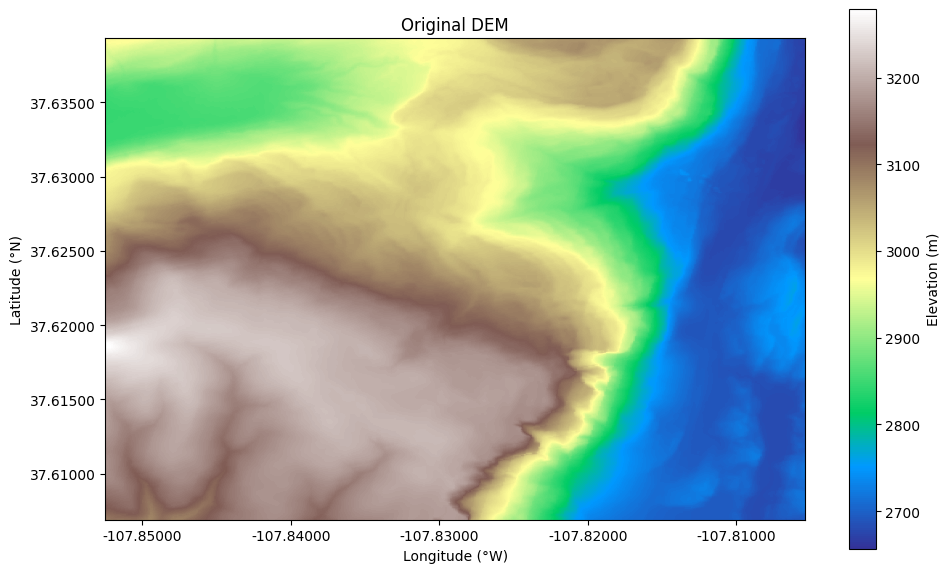

Saved: original_dem.png


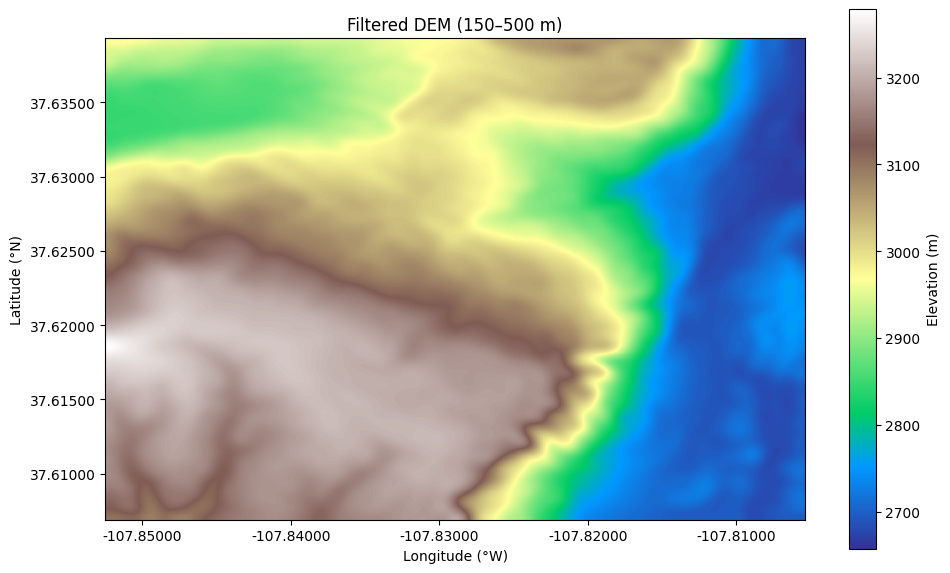

Saved: filtered_dem_1.png


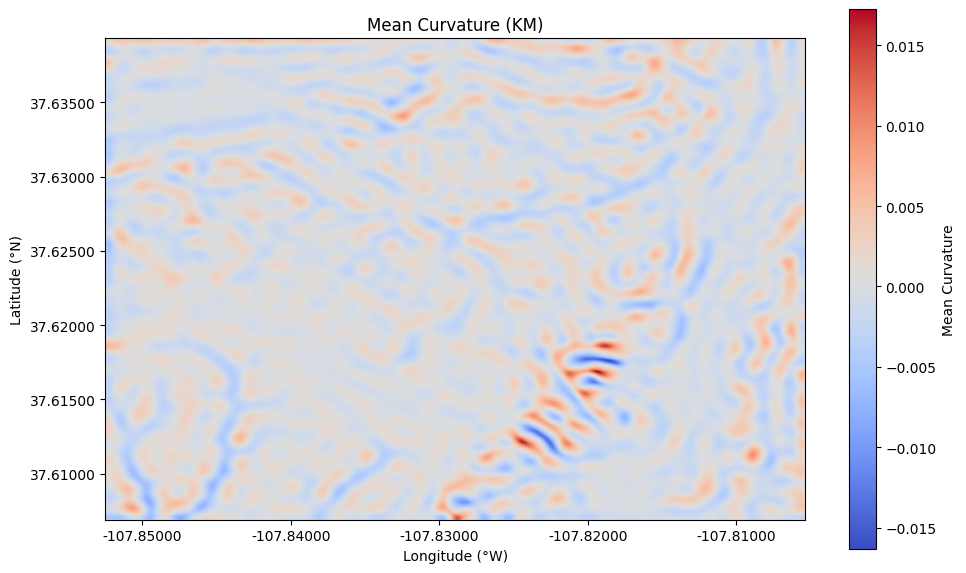

Saved: KM_1.png


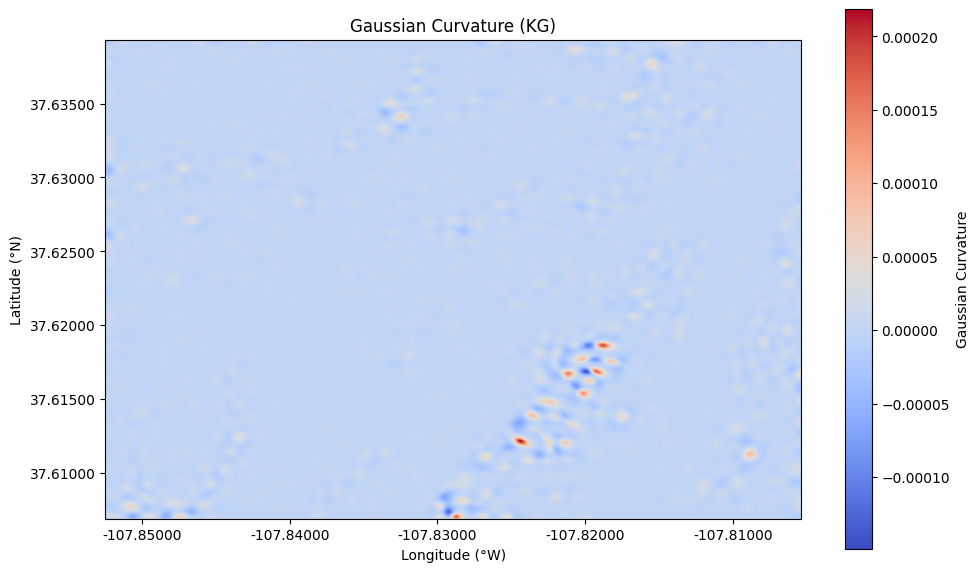

Saved: KG_1.png


In [5]:
# Plot the elevation values
dem.plot(dem.z_array,
          title="Original DEM",
          cmap="terrain",
          cbar_label="Elevation (m)",
          filename="original_dem.png",
          tiff_file=tiff_file)

# Plot the filtered elevation values
dem.plot(ZFilt1,
          title="Filtered DEM (150–500 m)",
          cmap="terrain",
          cbar_label="Elevation (m)",
          filename="filtered_dem_1.png",
          tiff_file=tiff_file)

# Plot Mean Curvature (KM)
dem.plot(KM,
          title="Mean Curvature (KM)",
          cmap="coolwarm",
          cbar_label="Mean Curvature",
          filename="KM_1.png",
          tiff_file=tiff_file)


# Plot Gaussian Curvature (KG)
dem.plot(KG,
          title="Gaussian Curvature (KG)",
          cmap="coolwarm",
          cbar_label="Gaussian Curvature",
          filename="KG_1.png",
          tiff_file=tiff_file)



5. Second Filtering (Lowpass: [90, 100])

In [6]:
dx, dy, ZFilt2 = spectral_filter.FFT([90, 100], "lowpass", 0.5)

# Compute curvature attributes again
K1, K2, KM, KG, SMAP, SDist, CMAP = dem.CurveCalc(ZFilt2, dx, dy, 0)

# Print results
print("Curvature values (K1, K2, KM, KG) for second filtering:")
print(K1, K2, KM, KG)


Curvature values (K1, K2, KM, KG) for second filtering:
[[ 0.00686834  0.00672602  0.00648564 ...  0.00210727  0.00185854
   0.00188004]
 [ 0.00873713  0.00859343  0.00835565 ...  0.00246028  0.00228399
   0.00232055]
 [ 0.00778155  0.00776366  0.00779474 ...  0.00239021  0.00191625
   0.00182001]
 ...
 [-0.00519731 -0.00650177 -0.00532671 ...  0.00416563  0.00445501
   0.00338253]
 [-0.00540221 -0.00676046 -0.00549112 ...  0.00384126  0.00419789
   0.00320365]
 [-0.00548019 -0.00657652 -0.00550347 ...  0.00368227  0.00406129
   0.00310605]] [[-2.30010017e-03 -2.83238833e-03 -2.11709925e-03 ...  9.52627564e-04
   6.28424089e-04  3.16414117e-04]
 [-2.51820408e-03 -3.14140560e-03 -2.47861833e-03 ...  7.87664930e-04
   4.39592470e-04  1.81207291e-04]
 [-2.88421790e-03 -3.66862950e-03 -3.13460207e-03 ...  5.18475909e-05
  -5.01620296e-05 -1.28100962e-04]
 ...
 [-9.10299875e-03 -9.10570015e-03 -8.99958631e-03 ... -7.60985162e-03
  -7.87540848e-03 -8.01704969e-03]
 [-9.04716665e-03 -9.005646

6. Plot and Save Second Filtered Results

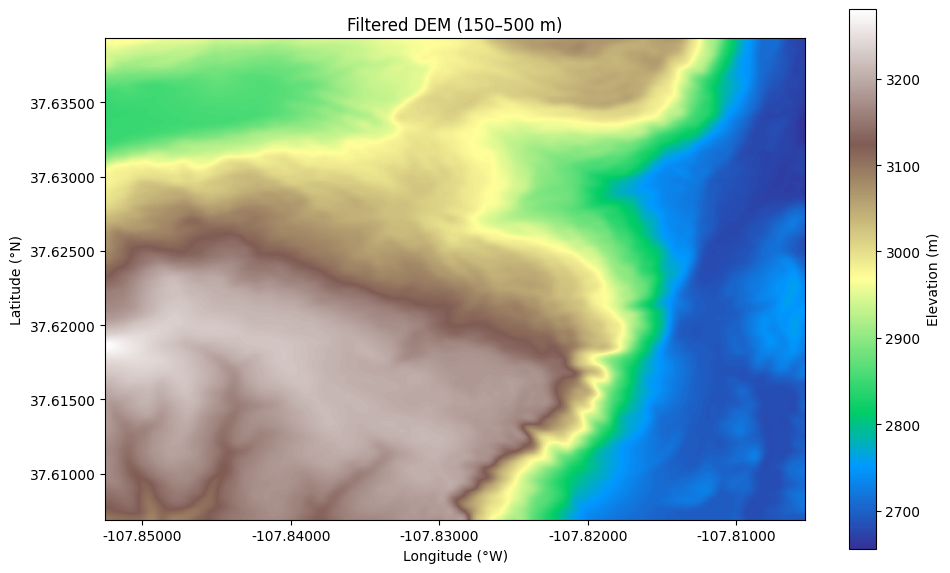

Saved: filtered_dem_2.png


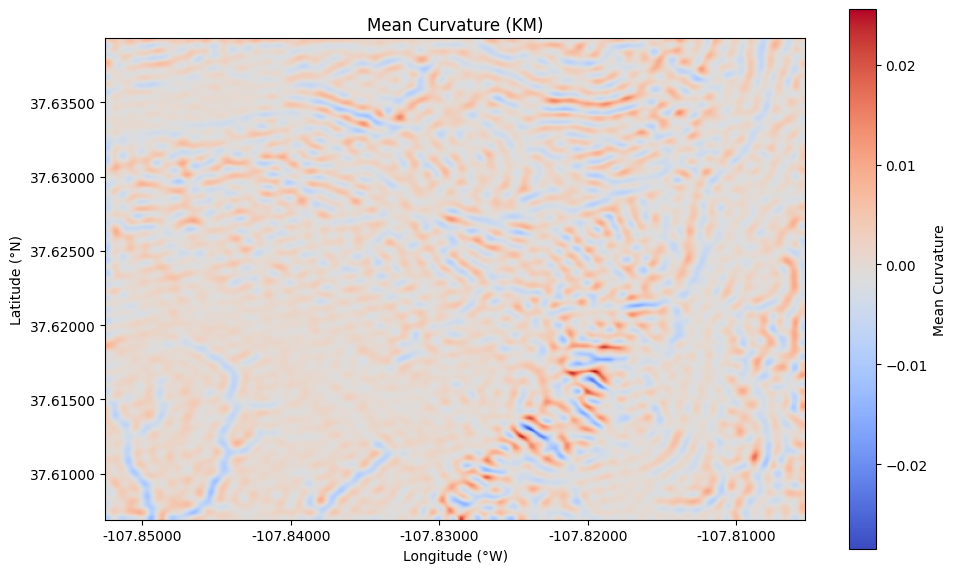

Saved: KM_2.png


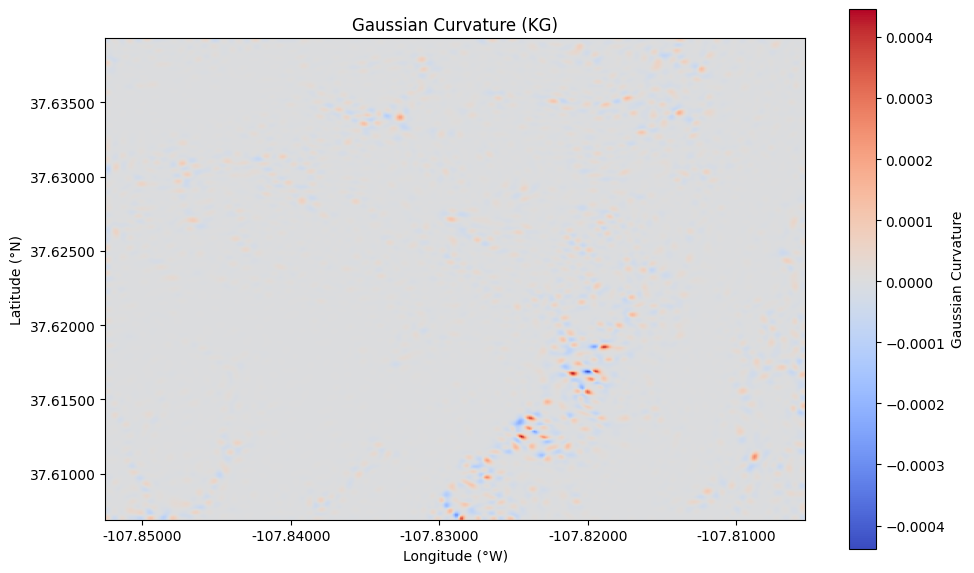

Saved: KG_2.png


In [7]:
# Plot the filtered elevation values
dem.plot(ZFilt2,
          title="Filtered DEM (150–500 m)",
          cmap="terrain",
          cbar_label="Elevation (m)",
          filename="filtered_dem_2.png",
          tiff_file=tiff_file)

# Plot Mean Curvature (KM)
dem.plot(KM,
          title="Mean Curvature (KM)",
          cmap="coolwarm",
          cbar_label="Mean Curvature",
          filename="KM_2.png",
          tiff_file=tiff_file)


# Plot Gaussian Curvature (KG)
dem.plot(KG,
          title="Gaussian Curvature (KG)",
          cmap="coolwarm",
          cbar_label="Gaussian Curvature",
          filename="KG_2.png",
          tiff_file=tiff_file)


7. Surface Classification Map

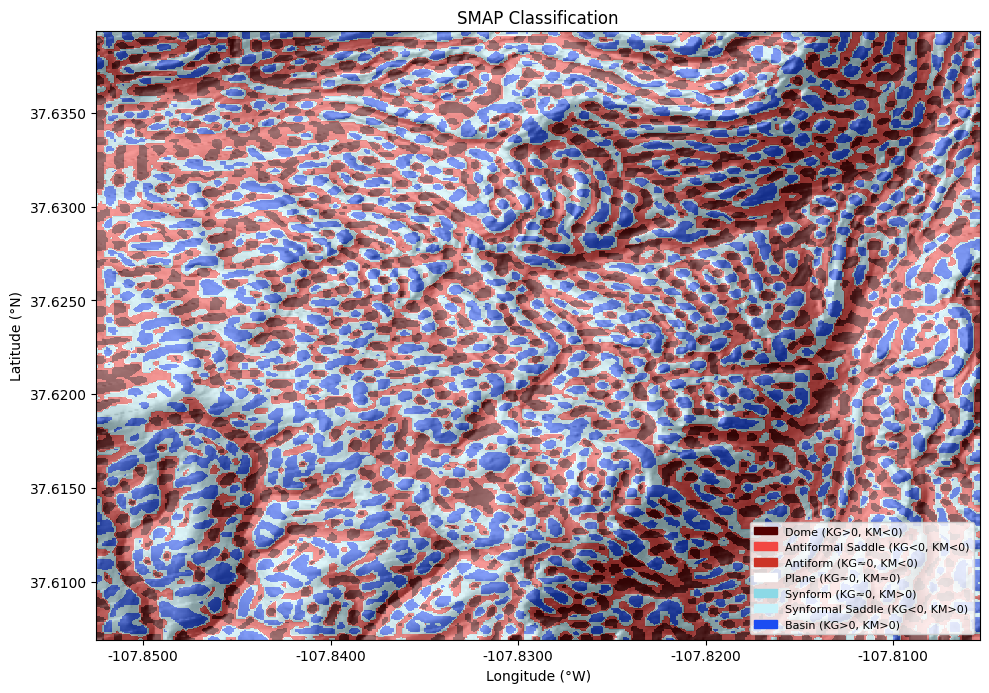

In [8]:
# Plot SMAP Classification
dem.plot_smap(SMAP, tiff_file=tiff_file)